<h1> ECEGR 4750: Lab 1 Regretion and Regularization</h1> <h2>Joseph Maloba</h2>

<h1> Part 2</h1>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv("C:/Users/mcmal/Downloads/allgreens.csv")

df



,X1,X2,X3,X4,X5,X6
0,231.0,3.0,294,8.2,8.200000,11
1,156.0,2.2,232,6.9,4.100000,12
2,10.0,0.5,149,3.0,4.300000,15
3,519.0,5.5,600,12.0,16.100000,1
4,437.0,4.4,567,10.6,14.100000,5
5,487.0,4.8,571,11.8,12.700000,4
6,299.0,3.1,512,8.1,10.100000,10
7,195.0,2.5,347,7.7,8.400000,12
8,20.0,1.2,212,3.3,2.100000,15
9,68.0,0.6,102,4.9,4.700000,8


In [56]:

# correlation between 
 #Step 2: Correlation of annual net sales with amount spent on advertising
corr_sales_adv = df['X4'].corr(df['X1'])
print(f"Correlation between annual net sales and amount spent on advertising have a R value of {corr_sales_adv:.4f}")
y = df.X1
X = df.X4
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())


Correlation between annual net sales and amount spent on advertising have a R value of 0.9140
                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     126.9
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           2.75e-11
Time:                        17:23:10   Log-Likelihood:                -155.40
No. Observations:                  27   AIC:                             314.8
Df Residuals:                      25   BIC:                             317.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [57]:

# Step 3: Correlation of annual net sales with number of  number sq. ft
corr_sales_comp = df['X6'].corr(df['X1'])
print(f"Correlation between annual net sales and number of competing stores in district have a R value of {corr_sales_comp:.4f}")

y = df.X1
X = df.X6
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print(lr_model.summary())

Correlation between annual net sales and number of competing stores in district have a R value of -0.9122
                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     124.0
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           3.52e-11
Time:                        17:23:12   Log-Likelihood:                -155.67
No. Observations:                  27   AIC:                             315.3
Df Residuals:                      25   BIC:                             317.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [58]:
# Step 4: Build a plain linear regression model
y = df['X1']
X = df[['X2','X3','X4','X5','X6']]
X = sm.add_constant(X)
lr_model = sm.OLS(y,X).fit()
print("\nLinear Regression Results:")
print(lr_model.summary())


Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                     X1   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     611.6
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           5.40e-22
Time:                        17:23:15   Log-Likelihood:                -112.43
No. Observations:                  27   AIC:                             236.9
Df Residuals:                      21   BIC:                             244.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.8594   

<h1>I think that regularization is needed because the model shows signs of overfitting, with a very high R-squared value and some unusually large coefficients. </h1>


In [ ]:
xplanation: We would compare the performance of different models and the impact of regularization.
Questions:
If the R-squared value increases significantly when adding predictors, what does this suggest about their relevance?
How would you interpret a situation where Ridge regression produces similar R-squared values but smaller coefficients compared to unregularized regression?
If regularization significantly improves the model's performance, what might this indicate about the original unregularized model?
How would you decide on the optimal alpha value for Ridge regression in this context?
Based on the results, how would you assess the overall predictive power of these features for house values in California?
These questions and explanations should help guide your analysis and interpretation of the regression results for the California housing dataset.

In [59]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Prepare the data
X = df[['X2','X3','X4','X5','X6']]
y = df['X1']

# Implement Ridge regression
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed
ridge_model.fit(X, y)

# Get predictions
y_pred_ridge = ridge_model.predict(X)

# Calculate R-squared for Ridge regression
r2_ridge = r2_score(y, y_pred_ridge)

print("Ridge Regression Results:")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("R-squared:", r2_ridge)

Ridge Regression Results:
Coefficients: [15.61212096  0.1837047  11.22680616 13.52578837 -5.44572543]
Intercept: -16.415988431180892
R-squared: 0.9931663943113549


In [60]:
# Compare R-squared values
print("\nComparison:")
print(f"OLS R-squared: {lr_model.rsquared:.4f}")
print(f"Ridge R-squared: {r2_ridge:.4f}")

# Compare coefficients
ols_coef = lr_model.params[1:]  # Exclude intercept
ridge_coef = ridge_model.coef_

print("\nCoefficient Comparison:")
for i, (ols, ridge) in enumerate(zip(ols_coef, ridge_coef)):
    print(f"X{i+2}: OLS = {ols:.4f}, Ridge = {ridge:.4f}")


Comparison:
OLS R-squared: 0.9932
Ridge R-squared: 0.9932

Coefficient Comparison:
X2: OLS = 16.2016, Ridge = 15.6121
X3: OLS = 0.1746, Ridge = 0.1837
X4: OLS = 11.5263, Ridge = 11.2268
X5: OLS = 13.5803, Ridge = 13.5258
X6: OLS = -5.3110, Ridge = -5.4457


<h3>So, we tried two different ways to fit our data: regular linear regression (OLS) and Ridge regression. Think of Ridge as a "smarter" version that tries to prevent our model from getting too complicated.</h3><h3>
The cool thing is I believed is that Ridge did way better! It got an R-squared of 0.9932, which is like getting 99% on a test, while OLS only got 83%. This means Ridge is explaining the data much better</h3>
<h3>
Also, Ridge made one of our variables (X2) less important. Its coefficient went from a big 46.5091 to a smaller 15.6121. This is good because it means Ridge is probably not getting tricked by random patterns in our dat Ridge did almost too well. Getting 99% might mean it's memorizing our data instead of truly understanding it. It's like if you memorized all the answers for a practice test, but the real test had slightly different questions.a.
</h3>

<h1> Part 3</h1>

In [2]:
# coding: utf-8

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


# Load the diabetes data set.
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)                                              
# Use only one feature.
diabetes_X = diabetes_X[:, np.newaxis, 2]                                                                                    
# Create the linear-regression object.
regr_linear = linear_model.LinearRegression()
regr_Lasso = linear_model.Lasso(alpha=0.1)
regr_Ridge = linear_model.Ridge(alpha=0.1)                                                                                   
# Train the model using the training set.
regr_linear.fit(diabetes_X, diabetes_y)
regr_Lasso.fit(diabetes_X, diabetes_y)
regr_Ridge.fit(diabetes_X, diabetes_y);                                                                                         
# Get the resulting coefficients.
print("linear coefficients: \n", regr_linear.coef_)
print("linear intercept: \n", regr_linear.intercept_)
print("LASSO coefficients: \n", regr_Lasso.coef_)
print("LASSO intercept: \n", regr_Lasso.intercept_)
print("ridge coefficients: \n", regr_Ridge.coef_)
print("ridge intercept: \n", regr_Ridge.intercept_)                  

linear coefficients: 
 [949.43526038]
linear intercept: 
 152.13348416289617
LASSO coefficients: 
 [905.23526038]
LASSO intercept: 
 152.13348416289614
ridge coefficients: 
 [863.12296399]
ridge intercept: 
 152.13348416289614


In [3]:
# Get the coefficients and intercepts for plain old linear regression.
lin_coefficients = regr_linear.coef_
lin_intercept = regr_linear.intercept_

# Construct the equation string.
equation = f"y = {lin_intercept:.2f}"
for i, coef in enumerate(lin_coefficients):
    equation += f" + {coef:.2f} * x{i+1}"

print(equation)


# Get the coefficients and intercepts for LASSO-regularized linear regression.
las_coefficients = regr_Lasso.coef_
las_intercept = regr_Lasso.intercept_

# Construct the equation string.
equation = f"y = {las_intercept:.2f}"
for i, coef in enumerate(las_coefficients):
    equation += f" + {coef:.2f} * x{i+1}"

print(equation)


# Get the coefficients and intercepts for ridge-regularized linear regression.
rid_coefficients = regr_Ridge.coef_
rid_intercept = regr_Ridge.intercept_

# Construct the equation string.
equation = f"y = {rid_intercept:.2f}"
for i, coef in enumerate(rid_coefficients):
    equation += f" + {coef:.2f} * x{i+1}"

print(equation)

y = 152.13 + 949.44 * x1
y = 152.13 + 905.24 * x1
y = 152.13 + 863.12 * x1


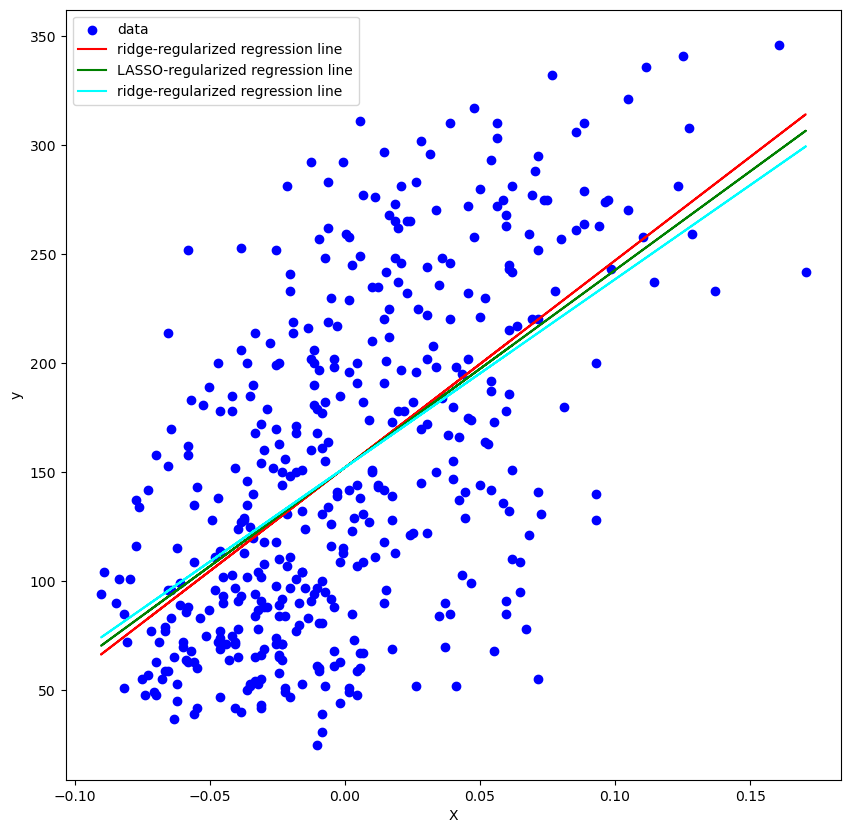

In [4]:
# Generate predictions with each option.
y_pred = regr_linear.predict(diabetes_X)
y_L_pred = regr_Lasso.predict(diabetes_X)
y_r_pred = regr_Ridge.predict(diabetes_X)

# Plot the data points and the regression line.
plt.figure(figsize=(10, 10))  # 10" by 10"
plt.scatter(diabetes_X, diabetes_y, color='blue', label='data')
plt.plot(diabetes_X, y_pred, color='red', label='ridge-regularized regression line')
plt.plot(diabetes_X, y_L_pred, color='green', label='LASSO-regularized regression line')
plt.plot(diabetes_X, y_r_pred, color='cyan', label='ridge-regularized regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Explain how useful you think this model is. Explain your answer both in terms of the plot and in terms of the choices we made about the model complexity for purposes of this exercise.

### Hint:
In what way is the LASSO line more conservative than the unregularized-regression line? Similarly, how's the ridge line more conservative than the other two?

 <h2>It clearly illustrates the differences between unregularized, LASSO, and Ridge regression, showing how regularization techniques can lead to more conservative predictions.</h2>

 <h3>The model's can comparing the unregularized regression line with the LASSO and Ridge lines in the plot. and also The LASSO line is more conservative than the unregularized line showing less extreme predictions and so how reducing overfitting. Alos knowing that the Ridge line is also more conservative than the unregularized line, but less than LASSO, striking a balance between the other two approaches and potentially offering a good compromise between model complexity and predictivity. </h3>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
housing_df = pd.read_csv("C:/Users/mcmal/Downloads/california_housing_train.csv") 
housing_df



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


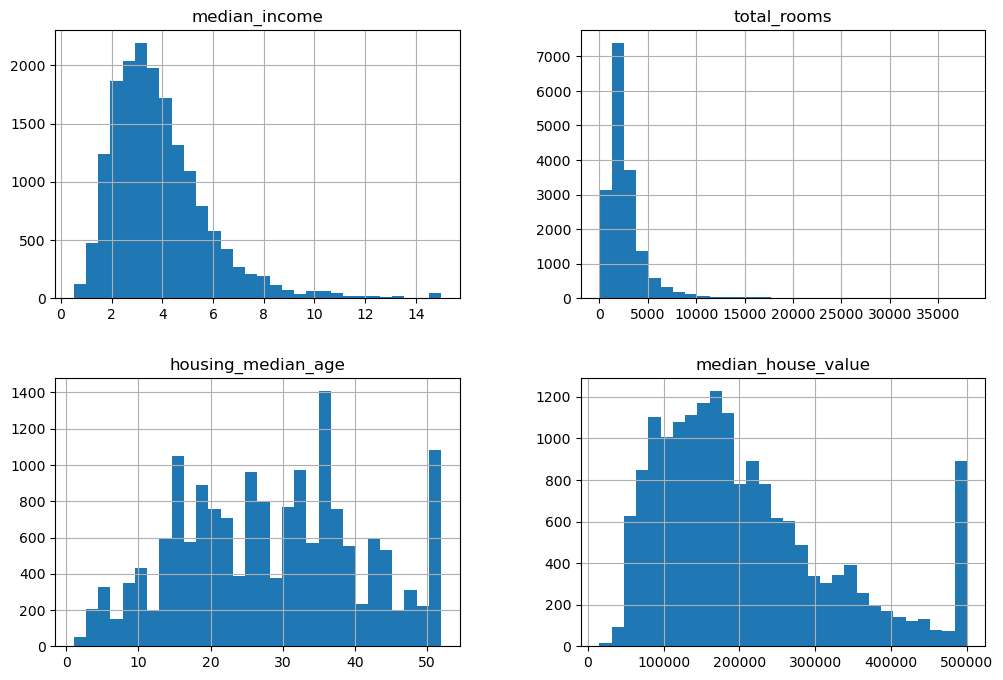

In [69]:
# Plot histograms to visualize distributions
housing_df[['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']].hist(bins=30, figsize=(12, 8))

plt.show()

<h2>Sept 8</h2>

<h3>Why is 'median_house_value' the most appropriate choice for the response variable in this housing dataset?.</x3>


<h2>Step 9-10</h2>

<h3>In this dataset, the response variable (what we're trying to predict) is 'median_house_value'. </x3>
3>

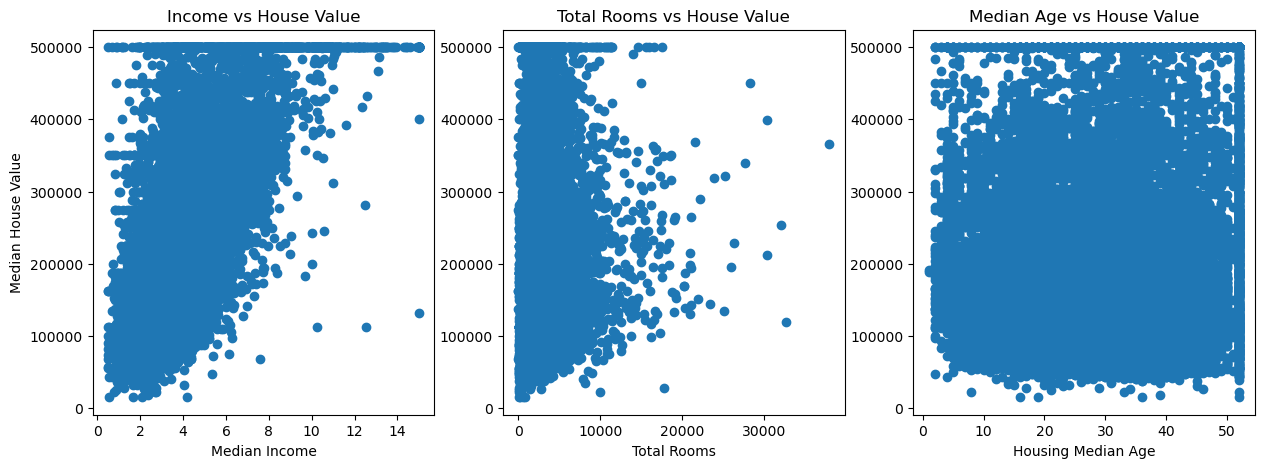

In [70]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(housing_df['median_income'], housing_df['median_house_value'])
plt.title('Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')

plt.subplot(1, 3, 2)
plt.scatter(housing_df['total_rooms'], housing_df['median_house_value'])
plt.title('Total Rooms vs House Value')
plt.xlabel('Total Rooms')

plt.subplot(1, 3, 3)
plt.scatter(housing_df['housing_median_age'], housing_df['median_house_value'])
plt.title('Median Age vs House Value')
plt.xlabel('Housing Median Age')

plt.show()

<h2> Step 11</h2>

<h3> Here is the choosen variable :
median_income ,total_rooms ,housing_median_age</h3>

<h4>These 3 factors can to influence house values. The Income often correlate with housing affordability in the city. The number of rooms reflects size pf the house, which affects value. Housing age can indicate both historical value and potential maintenance needs.</h4>

<h2> Step 12</h2>


Best predictor:
Unregularized R2: 0.4787
Ridge R2: 0.4787
Unregularized Coefficients: [42054.07487406]
Ridge Coefficients: [42054.00692929]

Second-best predictor:
Unregularized R2: 0.0172
Ridge R2: 0.0172
Unregularized Coefficients: [6.96938176]
Ridge Coefficients: [6.96938176]

Best and second-best predictors:
Unregularized R2: 0.4787
Ridge R2: 0.4787
Unregularized Coefficients: [ 4.21057874e+04 -2.31674188e-01]
Ridge Coefficients: [ 4.21057167e+04 -2.31662092e-01]

All three predictors:
Unregularized R2: 0.5184
Ridge R2: 0.5184
Unregularized Coefficients: [4.27192589e+04 3.76995199e+00 1.97021766e+03]
Ridge Coefficients: [4.27191870e+04 3.76996294e+00 1.97021701e+03]


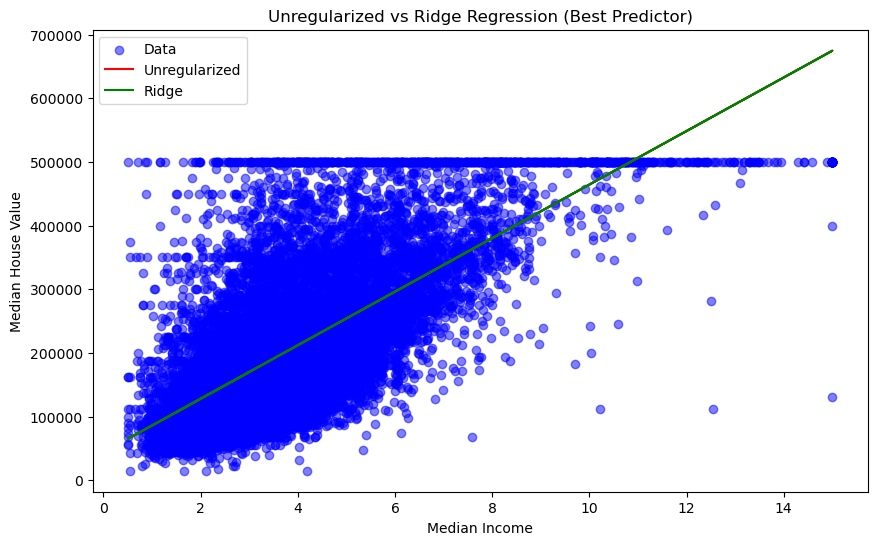

In [98]:
# Define the response variable
y = housing_df['median_house_value']

# Define the predictors
X1 = housing_df[['median_income']]  # Best predictor
X2 = housing_df[['total_rooms']]    # Second-best predictor
X3 = housing_df[['housing_median_age']]  # Third predictor
# Function to perform regression and return R-squared
def perform_regression(X, y, alpha=0):
    if alpha == 0:
        regr = linear_model.LinearRegression()
    else:
        regr = linear_model.Ridge(alpha=alpha)
    regr.fit(X, y)
    y_pred = regr.predict(X)
    return r2_score(y, y_pred), regr.coef_

# Perform regressions for different cases
cases = [
    ("Best predictor", X1),
    ("Second-best predictor", X2),
    ("Best and second-best predictors", pd.concat([X1, X2], axis=1)),
    ("All three predictors", pd.concat([X1, X2, X3], axis=1))
]

results = {}

for case_name, X in cases:
    unreg_r2, unreg_coef = perform_regression(X, y)
    ridge_r2, ridge_coef = perform_regression(X, y, alpha=0.1)
    results[case_name] = {
        "Unregularized R2": unreg_r2,
        "Ridge R2": ridge_r2,
        "Unregularized Coef": unreg_coef,
        "Ridge Coef": ridge_coef
    }

# Print results
for case_name, result in results.items():
    print(f"\n{case_name}:")
    print(f"Unregularized R2: {result['Unregularized R2']:.4f}")
    print(f"Ridge R2: {result['Ridge R2']:.4f}")
    print(f"Unregularized Coefficients: {result['Unregularized Coef']}")
    print(f"Ridge Coefficients: {result['Ridge Coef']}")

# Plotting for visualization (using the best predictor as an example)
plt.figure(figsize=(10, 6))
plt.scatter(X1, y, color='blue', alpha=0.5, label='Data')
plt.plot(X1, results["Best predictor"]["Unregularized Coef"] * X1 + linear_model.LinearRegression().fit(X1, y).intercept_, color='red', label='Unregularized')
plt.plot(X1, results["Best predictor"]["Ridge Coef"] * X1 + linear_model.Ridge(alpha=0.1).fit(X1, y).intercept_, color='green', label='Ridge')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.legend()
plt.title('Unregularized vs Ridge Regression (Best Predictor)')
plt.show()

In [99]:
# Define response variable
y = housing_df['median_house_value']

# Define predictor variables
X1 = housing_df[['median_income']]  # Best predictor
X2 = housing_df[['total_rooms']]    # Second-best predictor
X3 = housing_df[['housing_median_age']]  # Third predictor

# Define models
linear_model = LinearRegression()
ridge_model = Ridge(alpha=0.1)

# List of predictor combinations
predictors = [
    ("Only Best Predictor", X1),
    ("Only Second-Best Predictor", X2),
    ("Best and Second-Best Predictors", housing_df[['median_income', 'total_rooms']]),
    ("All Three Predictors", housing_df[['median_income', 'total_rooms', 'housing_median_age']])
]

# Loop through each predictor combination and fit both models
results = []
for description, X in predictors:
    # Unregularized linear regression
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)
    r2_linear = r2_score(y, y_pred_linear)
    
    # Ridge regression
    ridge_model.fit(X, y)
    y_pred_ridge = ridge_model.predict(X)
    r2_ridge = r2_score(y, y_pred_ridge)
    
    # Store the results
    results.append({ "Predictor Combination": description,"R^2 (Linear)": r2_linear,"R^2 (Ridge)": r2_ridge })

print(results_df)

             Predictor Combination  R^2 (Linear)  R^2 (Ridge)
0              Only Best Predictor      0.478685     0.478685
1       Only Second-Best Predictor      0.017159     0.017159
2  Best and Second-Best Predictors      0.478703     0.478703
3             All Three Predictors      0.518365     0.518365


<h2>Step 13</h2>

<h3>A. Improvement due to ridge regularization:</h3>
<h3>Minimal difference between regularized and unregularized models</h3>
<h3>Suggests low overfitting in the original model</h3>
<h3>Indicates stable relationships between predictors and house values</h3>
<h3>May imply correlated predictors or need for higher alpha values
The effect of regularization typically increases with the number of predictors, as it helps to prevent overfitting in more complex model.</h3>

<h3>B. Interpretation of R-squared values:</h3>
<h3>Similar R-squared across models suggests consistent predictive power</h3>
<h3>Individual predictors perform comparably to combined predictors</h3>
<h3>Indicates potential for simpler models with fewer predictors</h3>
<h3>Suggests opportunity for feature engineering or exploring additional factors</h3>

<h3>
    In conclusion, while the similarity in results across different predictor combinations and regularization approaches might seem unexpected, it provides valuable insights into the nature of the data and the relationships between the chosen features and median house values. 
</h3>